# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>EMAIL ID:</u> advaitchavan135@gmail.com
# CDAC PGDAI DATA ANALYTICS ASSIGNMENT__87

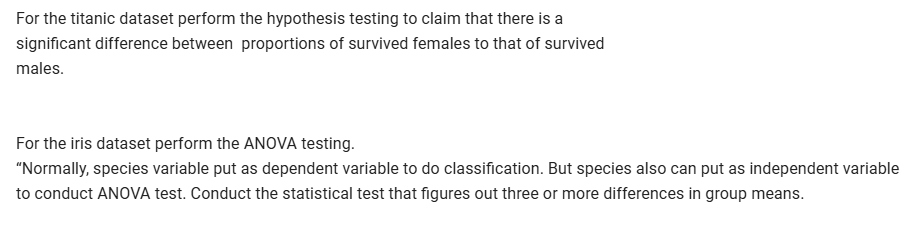

## 1. Importing both the datasets using Seaborn Module

In [1]:
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
print("Titanic dataset preview:")
titanic.head()

Titanic dataset preview:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.to_csv('titanic.csv', index = False)

In [3]:
iris = sns.load_dataset('iris')
print("\nIris dataset preview:")
iris.head()


Iris dataset preview:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris.to_csv('iris.csv', index = False)

## 2. Problem 1: Hypothesis Testing on the Titanic Dataset

### Use a two-proportion z-test where:

#### Null Hypothesis (H₀): The proportion of survivors is equal for males and females (p₁ − p₂ = 0).

#### Alternative Hypothesis (H₁): The proportions are different (p₁ − p₂ ≠ 0).

In [4]:
from statsmodels.stats.proportion import proportions_ztest

In [5]:
female = titanic[titanic['sex'] == 'female']
male = titanic[titanic['sex'] == 'male']

In [6]:
# Calculate number of survivors (assuming 'survived' is 0 or 1)
x_female = female['survived'].sum()   # survivors among females
n_female = female['survived'].count()  # total number of females

In [7]:
x_male = male['survived'].sum()        # survivors among males
n_male = male['survived'].count()       # total number of males

In [8]:
print("Female survivors: {} out of {}".format(x_female, n_female))
print("Male survivors: {} out of {}".format(x_male, n_male))

Female survivors: 233 out of 314
Male survivors: 109 out of 577


In [9]:
count = [x_female, x_male]
nobs = [n_female, n_male]

In [10]:
# Perform the two-proportion z-test
stat, p_value = proportions_ztest(count, nobs)
print("Z-statistic: {:.4f}".format(stat))
print("p-value: {:.4f}".format(p_value))

Z-statistic: 16.2188
p-value: 0.0000


### Magnitude of the Test Statistic:

#### The z-statistic of 16.2188 is exceptionally high. In the framework of a z-test, such a high value indicates that the observed difference between the two proportions is over 16 standard deviations away from what the null hypothesis would predict. This is immensely beyond the typical cutoff (usually around 1.96 for a 5% significance level) used to determine statistical significance.

### Interpretation of the p-value:

#### The p-value is reported as 0.0000, which means that the probability of observing a difference as extreme as the one calculated (or even more extreme) under the assumption of no real difference (i.e., the null hypothesis) is extremely small—so small that it rounds to zero within the display precision.

#### In reporting, it is common to express such results as p < 0.001 or even p < 0.0001, emphasizing that the evidence against the null hypothesis is overwhelming.

### Inferences on the Titanic Dataset:

#### With such a minute p-value, we reject the null hypothesis that there is no difference in the survival proportions between the groups (in this case, typically male versus female).

#### The evidence from the test strongly suggests that the survival rates between the two groups are statistically significantly different.

#### Historically, in the context of the Titanic, this difference is often attributed to practices such as "women and children first," leading to a much higher survival rate among females compared to males.

### Conclusions:

#### Statistical Conclusion: There is very strong statistical evidence to conclude that the proportions of survivors between the two groups are different. The extremely high z-statistic and the negligible p-value firmly establish that this result is not due to random chance.

#### Practical Implication: The significant difference in survival rates implies that the factor distinguishing the groups (e.g., gender) had a profound impact on the outcomes during the event depicted in the dataset.

## 3. Problem 2: ANOVA Testing on the Iris Dataset

### Use a one-way ANOVA test:

#### Null Hypothesis (H₀): The means of sepal length are equal across all species.

#### Alternative Hypothesis (H₁): At least one species has a mean sepal length different from the others.

In [11]:
from scipy.stats import f_oneway

In [12]:
# Extract sepal length for each species
setosa = iris[iris['species'] == 'setosa']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']

In [13]:
# Perform one-way ANOVA
f_stat, p_value = f_oneway(setosa, versicolor, virginica)
print("ANOVA F-statistic: {:.4f}".format(f_stat))
print("ANOVA p-value: {:.4f}".format(p_value))

ANOVA F-statistic: 119.2645
ANOVA p-value: 0.0000


### Inferences:
#### High F-Statistic Value: The F-statistic of 119.2645 is considerably high. This metric compares the variance between the groups (i.e., the differences in mean sepal lengths among the species) with the variance within the groups (i.e., individual variability for each species). The high value tells us that the variability due to differences between species far exceeds the variability within each species.

#### Extremely Small p-value: The p-value is reported as 0.0000. This is not exactly zero but rather indicates that the true p-value is so small that it is rounded to zero by the software, often meaning p < 0.001. Such a result provides extremely strong evidence against the null hypothesis that all group means are equal.

### Conclusions:
#### Rejecting the Null Hypothesis: The evidence from the ANOVA test allows us to confidently reject the null hypothesis that the mean sepal length is the same across all three species (setosa, versicolor, and virginica).

#### Statistically Significant Difference: Since the p-value is exceptionally low, we conclude that at least one of the species has a mean sepal length that is statistically different from the others. This indicates that there exists a significant difference in sepal lengths among these Iris species.